In [2]:
#importando as bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.DataFrame({
    "Potência":[120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    "Eficiência":[92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    "Idade":[3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    "Tamanho":[50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    "Consumo de Energia":['Eficiente','Ineficiente','Ineficiente',
                          'Eficiente','Ineficiente','Eficiente',
                          'Ineficiente','Eficiente','Eficiente',
                          'Ineficiente']
})

In [6]:
# Separando a base de dados em X e Y
x=data[['Potência','Eficiência','Idade','Tamanho']]
y=data['Consumo de Energia']

In [7]:
# Dividindo a base de dados em treino e teste
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,
                                                random_state=42)

In [8]:
# Criação do medelo de Machine Learning
modelo= SVC(kernel='linear')
modelo.fit(x_train,y_train)

SVC(kernel='linear')

In [9]:
# Fazendo predições
yprev = modelo.predict(x_test)

In [10]:
yprev

array(['Eficiente', 'Ineficiente', 'Eficiente'], dtype=object)

In [11]:
x_test

,Potência,Eficiência,Idade,Tamanho
8,115,88,3,56
1,80,65,8,45
5,130,95,2,62


In [12]:
data.head(20)

,Potência,Eficiência,Idade,Tamanho,Consumo de Energia
0,120,92,3,50,Eficiente
1,80,65,8,45,Ineficiente
2,100,75,5,55,Ineficiente
3,110,85,4,60,Eficiente
4,90,68,7,48,Ineficiente
5,130,95,2,62,Eficiente
6,70,60,10,40,Ineficiente
7,105,80,6,58,Eficiente
8,115,88,3,56,Eficiente
9,85,70,9,47,Ineficiente


In [13]:
# Calculo das métricas do algoritimo de Machine Learning
# Acurácia = VP+VN / Total(VP + FP+FN+VN)
acc = accuracy_score(yprev,y_test)
acc

1.0

In [14]:
# Classification report
cr=classification_report(yprev,y_test)
print(cr)

              precision    recall  f1-score   support

   Eficiente       1.00      1.00      1.00         2
 Ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [15]:
# Matriz de confusão
cm = confusion_matrix(yprev,y_test)
print(cm)

[[2 0]
 [0 1]]


Text(50.72222222222221, 0.5, 'Real')

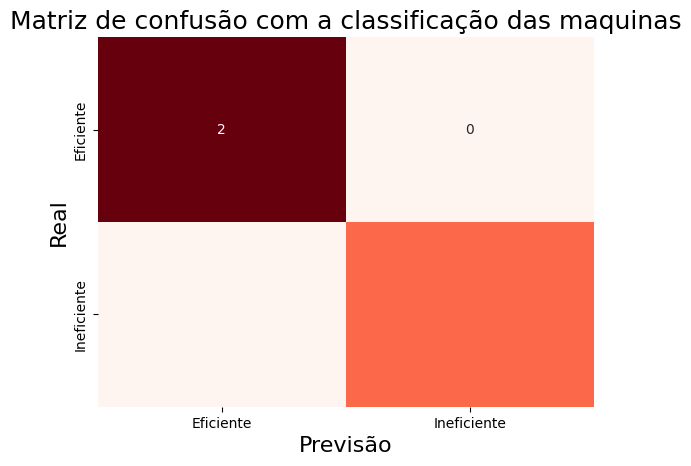

In [17]:
# Visualizando a matriz de confusão de forma gráfica
sns.heatmap(cm,annot=True,cmap='Reds',cbar=False,
            xticklabels=['Eficiente','Ineficiente'],
            yticklabels=['Eficiente','Ineficiente']
)
plt.title('Matriz de confusão com a classificação das maquinas',fontsize=18)
plt.xlabel('Previsão',fontsize=16)
plt.ylabel('Real',fontsize=16)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

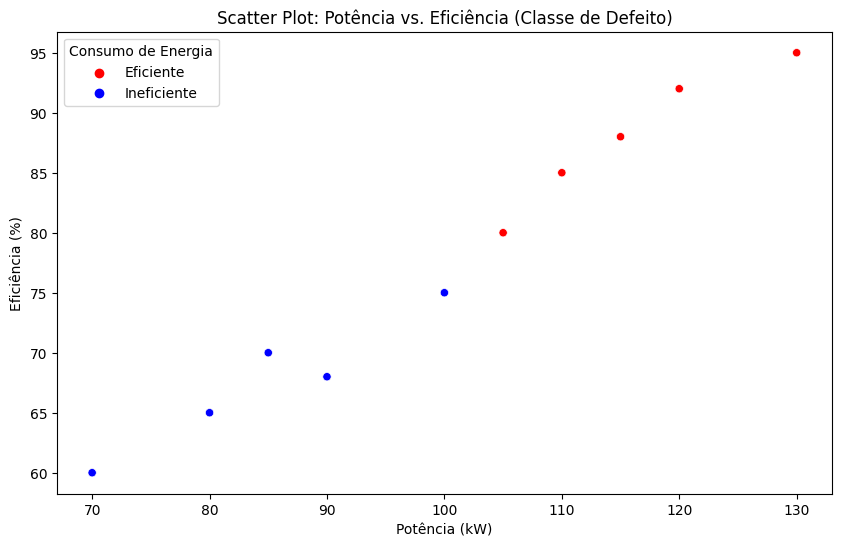

In [18]:
# Mapeando as cores com base na classe
palette = {"Eficiente": "red", "Ineficiente": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Potência', y='Eficiência', hue='Consumo de Energia', data=data, palette= palette)
 
# Personalizando o gráfico
plt.title('Scatter Plot: Potência vs. Eficiência (Classe de Defeito)')
plt.xlabel('Potência (kW)')
plt.ylabel('Eficiência (%)')
 
# Mostrando o gráfico
plt.legend(title='Consumo de Energia')
plt.show()